In [1]:
# Basic packages
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import math
import netCDF4 as nc

# DateTime packages
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import time
import matplotlib.dates as mdates

# Stats packages
import scipy
import bottleneck as bn
import PyCO2SYS as pyco2
import gsw
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns

# Logistical packages
import requests
from importlib import reload
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

In [2]:
DIC = [2000,2000,2000,2000,2000,2000,2000,2000,2000]
TA = [2500,2500,2500,2500,2500,2500,2500,2500,2500]
S = [30,30,30,30,30,30,30,30,30]
T = [0,5,10,15,20,25,30,35,40]
results = pyco2.sys(par1 = TA, par2 = DIC, par1_type = 1, par2_type = 2, temperature = T, salinity = S,
                    grads_of=["HCO3", 'k_carbonic_1', 'k_carbonic_2', 'CO3', 'CO2', 'Hfree', 'k_CO2'],
                    grads_wrt=['temperature'])

In [3]:
kCO2 = results['k_CO2']
k1 = results['k_carbonic_1']
k2 = results['k_carbonic_2']
kw = results['k_water']
HCO3 = results['HCO3']
bicarb = results['bicarbonate']
CO3 = results['CO3']
carb = results['carbonate']
CO2 = results['CO2']
co2aq = results['aqueous_CO2']
Hfree = results['Hfree']

Text(0.5, 1.0, 'DIC')

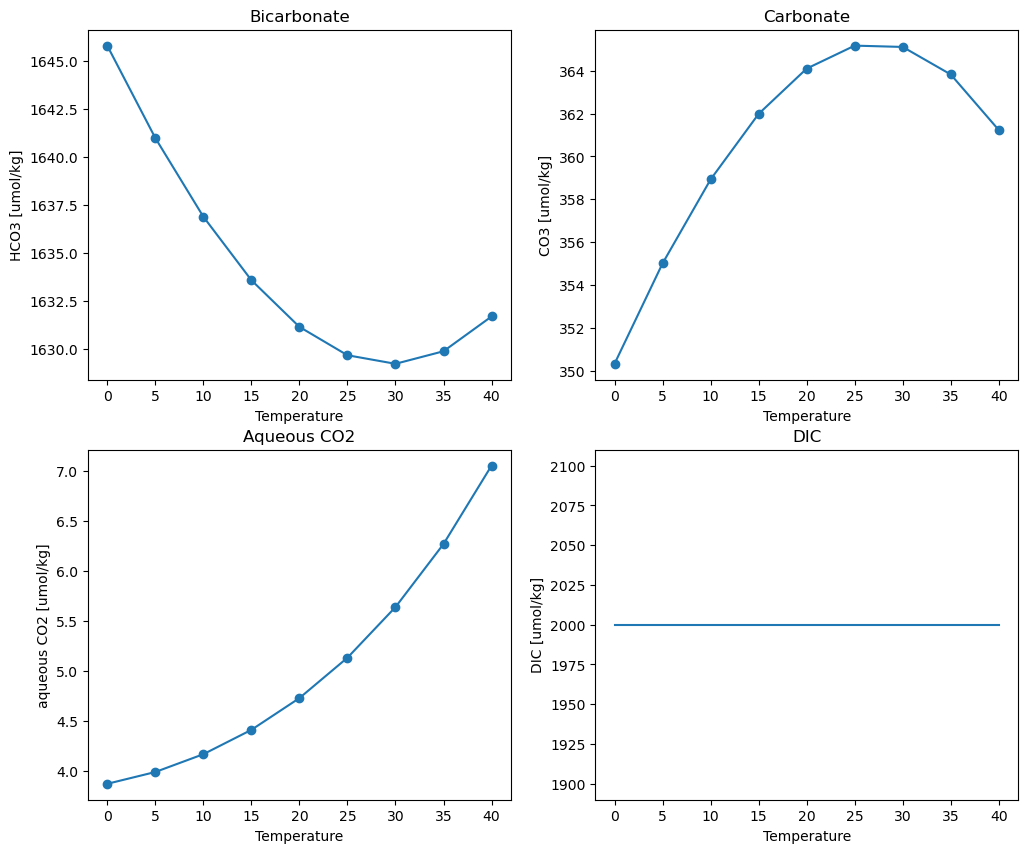

In [4]:
fig, axarr = plt.subplots(nrows = 2, ncols = 2, figsize = [12,10])
axarr = axarr.flatten()

ax = axarr[0]
ax.plot(T, HCO3, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('HCO3 [umol/kg]')
ax.set_title('Bicarbonate')
ax = axarr[1]
ax.plot(T, CO3, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('CO3 [umol/kg]')
ax.set_title('Carbonate')
ax = axarr[2]
ax.plot(T, CO2, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('aqueous CO2 [umol/kg]')
ax.set_title('Aqueous CO2')
ax = axarr[3]
ax.plot(T, HCO3 + CO3 + CO2)
# ax.plot(T, Hfree*1000, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('DIC [umol/kg]')
ax.set_title('DIC')

Text(0.5, 1.0, 'K1/k2')

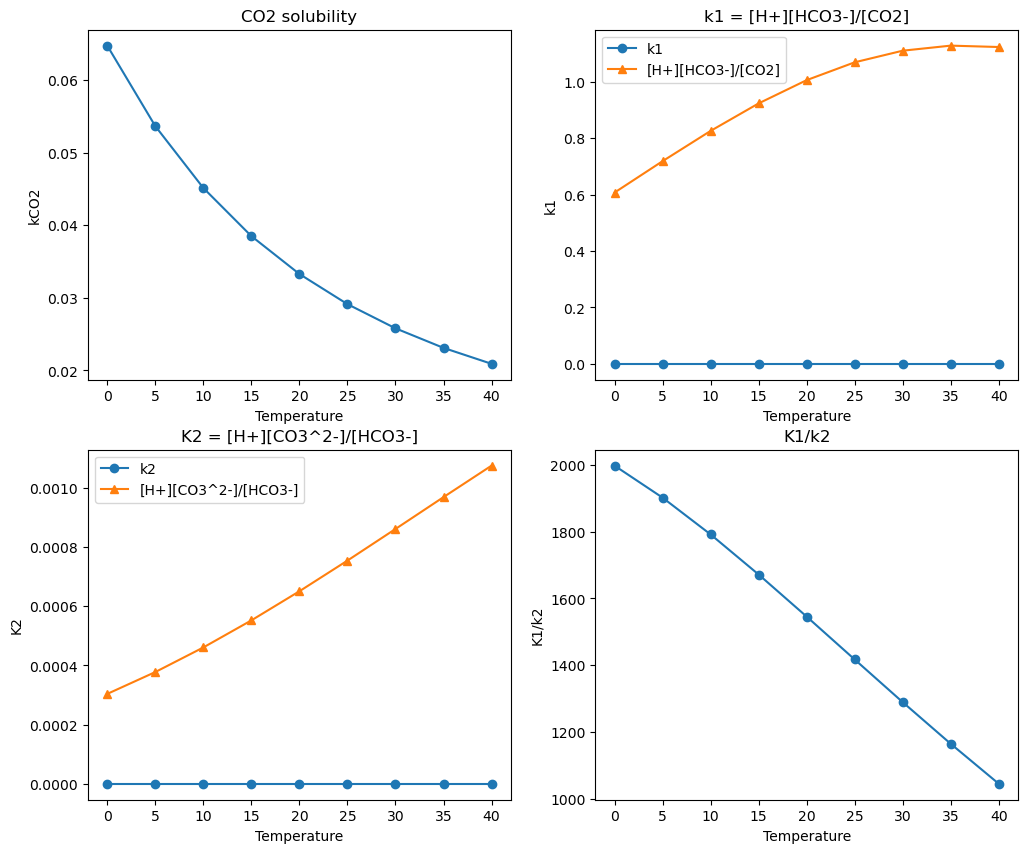

In [6]:
fig, axarr = plt.subplots(nrows = 2, ncols = 2, figsize = [12,10])
axarr = axarr.flatten()

ax = axarr[0]
ax.plot(T, kCO2, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('kCO2')
ax.set_title('CO2 solubility')
ax = axarr[1]
ax.plot(T, k1, marker = 'o', label = 'k1')
ax.plot(T, (Hfree*bicarb)/co2aq, marker = '^', label = '[H+][HCO3-]/[CO2]')
ax.set_xlabel('Temperature')
ax.set_ylabel('k1')
ax.set_title('k1 = [H+][HCO3-]/[CO2]')
ax.legend()
ax = axarr[2]
ax.plot(T, k2, marker = 'o', label = 'k2')
ax.plot(T, (Hfree*carb)/bicarb, marker = '^', label = '[H+][CO3^2-]/[HCO3-]')
ax.set_xlabel('Temperature')
ax.set_ylabel('K2')
ax.set_title('K2 = [H+][CO3^2-]/[HCO3-]')
ax.legend()
ax = axarr[3]
ax.plot(T, k1/k2, marker = 'o')
ax.set_xlabel('Temperature')
ax.set_ylabel('K1/k2')
ax.set_title('K1/k2')

Text(0.5, 1.0, '$H_2CO_3^* \\rightleftharpoons H^+ + HCO_3^-$')

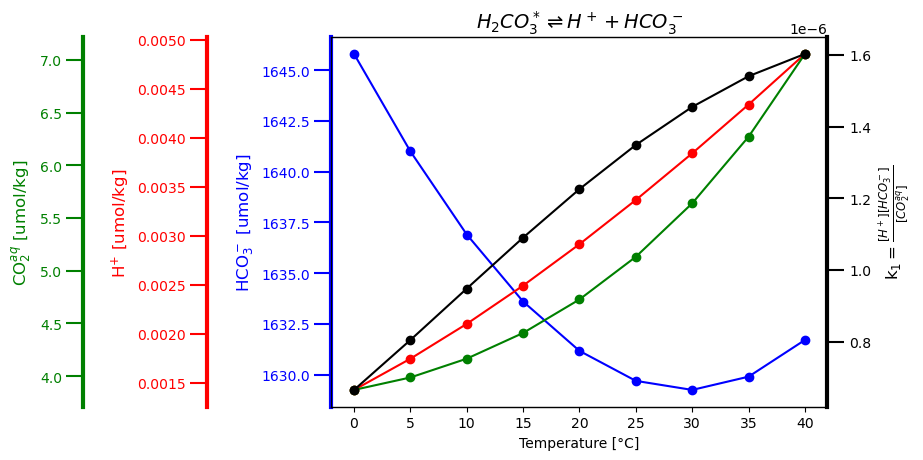

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# Bicarbonate
ax1.plot(T, HCO3, marker = 'o', c = 'blue')
ax1.set_xlabel('Temperature [°C]')
p1 = ax1.set_ylabel('HCO$_3^-$ [umol/kg]', color = 'blue', fontsize = 12)

# H+
ax2.plot(T, Hfree, marker = 'o', c = 'red')
p2 = ax2.set_ylabel('H$^{+}$ [umol/kg]', color = 'red', fontsize = 12)

# CO2 aqueous
ax3.plot(T, CO2, marker = 'o', c = 'green')
p3 = ax3.set_ylabel('CO$_2^{aq}$ [umol/kg]', color = 'green', fontsize = 12)

# H+
ax4.plot(T, k1, marker = 'o', c = 'k')
p4 = ax4.set_ylabel(r'k$_1 = \frac{[H^+][HCO_3^-]}{[CO_2^{aq}]}$', color = 'k', fontsize = 12)

ax2.spines["left"].set_position(("axes", -0.25))
ax3.spines["left"].set_position(("axes", -0.5))
ax4.spines["right"].set_position(("axes", 1))

tkw = dict(labelsize = 10, size=12, width=1.5)
ax1.tick_params(axis='y', colors='blue', **tkw)
ax2.tick_params(axis='y', colors='red', **tkw)
ax3.tick_params(axis='y', colors='green', **tkw)
ax4.tick_params(axis='y', colors='k', **tkw)

ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(3)
ax2.spines["left"].set_color('red')
ax2.spines["left"].set_linewidth(3)
ax3.spines['left'].set_color('green')
ax3.spines['left'].set_linewidth(3)
ax4.spines['right'].set_color('k')
ax4.spines['right'].set_linewidth(3)

ax2.yaxis.set_ticks_position("left")
ax2.yaxis.set_label_position("left")
ax3.yaxis.set_ticks_position("left")
ax3.yaxis.set_label_position("left")
# ax4.yaxis.set_ticks_position("left")
# ax4.yaxis.set_label_position("left")

# txt1 = r'$CO_2 + H_2O \rightleftharpoons H_2CO_3^*$'
# txt2 = r'$H_2CO_3^* \rightleftharpoons H^+ + HCO_3^-$'
# txt3 = r'$HCO_3^- \rightleftharpoons H^+ + CO_3^{2-}$'
# txt = txt1 + '\n' + txt2 + '\n' + txt3
# plt.annotate(txt,
#              xy=(1.25,0.5), xycoords = 'axes fraction',
#              # xytext=(1.25, 0.1), horizontalalignment="center",
#              arrowprops=dict(arrowstyle='<- , head_width = 0.5',lw=4, color = 'blue'), fontsize = 10,
#             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))

ax1.set_title(r'$H_2CO_3^* \rightleftharpoons H^+ + HCO_3^-$', fontsize = 14)